<div class="alert alert-block alert-success">
<h4><center>Harshil Patel (pmb5br@virginia.edu) DS 5001 Spring 2023</center></h4>
</div>

<hr>

<div class="alert alert-block alert-info">
<h3><center> The Sun Also Rises, by Ernest Hemingway</center></h3>
</div>

<hr>

<div class="alert alert-block alert-warning">
<h4><center>Notebook 5: Content</center></h4> 
<ul>
  <li>Using SciKit Learn for Topic Modeling Analysis</li>
  <li>Obtaining TFIDF from Bag-of-Words</li>
  <li>Creating a Normalized Table for Topic Modeling</li>
  <li>Performing LDA with SciKit Learn</li>
    <ul>
        <li>Converting Tokens Back to Document Table</li>
        <li>Generating LDA Model</li>
        <li>Examining Theta for Topic Modeling</li>
        </ul>
  <li>Calculating Topic Entropy Over Terms</li>
  <li>Calculating Document Entropy Over Topics</li>
  <li>Inspecting Topic Modeling Results</li>
  <li>Analyzing Most Frequently Appearing Terms for Topic Modeling</li>
  <li>Sorting Topics by Document Weight for Topic Modeling</li>
</ul>
    
Tables saved - DTM, docs, PHI, THETA
    
</div>

<hr>

In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np
import plotly.express as px
import re
import seaborn as sns

In [2]:
from glob import glob
from numpy.linalg import norm
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import nltk
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as pla

### Exploring using SciKit Learn

In [3]:
TOKEN_NLTK_ANNOTATED = pd.read_csv(f"../data/output/nltk_tokens.csv", index_col=0)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

In [6]:
DOC = OHCO[:2]

In [7]:
F1 = TOKEN_NLTK_ANNOTATED.dropna().groupby(DOC).term_str.apply(' '.join) #converted back to document strings 

tfidf_engine = TfidfVectorizer(lowercase=True, stop_words='english') #feed to tfidf engine, apply that engine to the model
tfidf_model = tfidf_engine.fit_transform(F1)

In [8]:
DTM = pd.DataFrame(tfidf_model.toarray(), columns=tfidf_engine.get_feature_names())
DTM.index.name = 'doc_id'

C:\Users\Harshil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
DTM.T.sort_values(0, ascending=False).iloc[:20, :10]\
    .style.background_gradient(cmap='GnBu')

doc_id,0,1,2,3,4,5,6,7,8,9
boxing,0.443170,0.167378,0.107898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
spider,0.275823,0.347246,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
princeton,0.258207,0.000000,0.314327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
thoroughly,0.193204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
champion,0.183882,0.173623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
middleweight,0.183882,0.173623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kelly,0.183882,0.347246,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cohn,0.177017,0.167141,0.053873,0.144008,0.278227,0.068149,0.088017,0.000000,0.000000,0.000000
nose,0.156202,0.000000,0.095076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
certain,0.154011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
DTM.mean().sort_values(ascending=False).head(20)

said     0.058356
brett    0.028204
don      0.025767
mike     0.019454
know     0.018489
yes      0.017779
good     0.017501
asked    0.016694
come     0.016607
like     0.016549
did      0.015818
cohn     0.015813
right    0.014639
ll       0.014579
going    0.013560
oh       0.013370
want     0.012859
let      0.012279
jake     0.011825
say      0.011760
dtype: float64

In [11]:
csv_file = f"../data/output/DTM.csv"
DTM.to_csv(csv_file)

### LDA with SciKit Learn

In [12]:
ngram_range = [1,2]
n_terms = 4000
n_topics = 40
max_iter = 20
n_top_terms = 9

In [13]:
OHCO = ['book_id', 'chap_num', 'para_num']
PARA = OHCO[:3]
CHAP = OHCO[:2]
BOOK = OHCO[:1]

In [14]:
BAG= CHAP

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [16]:
TOKEN_NLTK_ANNOTATED['book_id'] = 'The Sun Also Rises'

In [17]:
DOCS = TOKEN_NLTK_ANNOTATED[TOKEN_NLTK_ANNOTATED.pos.str.match(r'^NNS?$')]\
    .groupby(BAG).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'doc_str'})

In [18]:
DOCS.head()

doc_str
book_id            chap_num                                                   
The Sun Also Rises 1         champion boxing title lot nothing boxing fact ...
                   2         winter novel publisher row frances women publi...
                   3         spring night table terrace signs crowd clippet...
                   4         taxi hill square dark street du asphalt trees ...
                   5         morning rue coffee brioche morning trees garde...

In [19]:
csv_file = f"../data/output/docs.csv"
DOCS.to_csv(csv_file)

### Creating Vector Space

In [20]:
count_engine = CountVectorizer(max_features=n_terms, ngram_range=ngram_range, stop_words='english')
count_model = count_engine.fit_transform(DOCS.doc_str)
TERMS = count_engine.get_feature_names()

C:\Users\Harshil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Generating Model

In [21]:
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

### Theta

In [22]:
THETA = pd.DataFrame(lda_engine.fit_transform(count_model), index=DOCS.index)
THETA.columns.name = 'topic_id'

In [23]:
THETA.head()

topic_id                           0         1         2         3         4   \
book_id            chap_num                                                     
The Sun Also Rises 1         0.000111  0.000111  0.000111  0.000111  0.000111   
                   2         0.000102  0.000102  0.000102  0.000102  0.996020   
                   3         0.000052  0.000052  0.000052  0.000052  0.000052   
                   4         0.000047  0.000047  0.000047  0.000047  0.998160   
                   5         0.000102  0.000102  0.000102  0.000102  0.000102   

topic_id                           5         6         7         8         9   \
book_id            chap_num                                                     
The Sun Also Rises 1         0.000111  0.000111  0.000111  0.000111  0.000111   
                   2         0.000102  0.000102  0.000102  0.000102  0.000102   
                   3         0.000052  0.000052  0.000052  0.000052  0.000052   
                   4         0.000047  0.000047  0.000047  0.000047  0.000047   
                   5         0.000102  0.000102  0.000102  0.000102  0.000102   

topic_id                     ...        30        31        32        33  \
book_id            chap_num  ...                                           
The Sun Also Rises 1         ...  0.000111  0.000111  0.000111  0.000111   
                   2         ...  0.000102  0.000102  0.000102  0.000102   
                   3         ...  0.000052  0.997956  0.000052  0.000052   
                   4         ...  0.000047  0.000047  0.000047  0.000047   
                   5         ...  0.000102  0.000102  0.000102  0.000102   

topic_id                           34        35        36        37        38  \
book_id            chap_num                                                     
The Sun Also Rises 1         0.000111  0.000111  0.995667  0.000111  0.000111   
                   2         0.000102  0.000102  0.000102  0.000102  0.000102   
                   3         0.000052  0.000052  0.000052  0.000052  0.000052   
                   4         0.000047  0.000047  0.000047  0.000047  0.000047   
                   5         0.000102  0.000102  0.000102  0.000102  0.000102   

topic_id                           39  
book_id            chap_num            
The Sun Also Rises 1         0.000111  
                   2         0.000102  
                   3         0.000052  
                   4         0.000047  
                   5         0.000102  

[5 rows x 40 columns]

In [24]:
THETA.style.background_gradient( high=.5)

In [25]:
csv_file = f"../data/output/THETA.csv"
THETA.to_csv(csv_file)

### Phi

In [26]:
PHI = pd.DataFrame(lda_engine.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [27]:
PHI.T.sample(10).style.background_gradient(cmap='GnBu', high=.5)

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
term_str,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
pleasure innkeeper,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
house,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,2.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,2.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000
minutes race,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
mix stuff,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
line trees,0.025000,0.025000,0.025000,3.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
shook,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
trip,0.025000,0.025000,0.025000,0.025000,9.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000
poles,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,2.025000,0.025000
train plenty,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000


In [28]:
csv_file = f"../data/output/PHI.csv"
PHI.to_csv(csv_file)

### Compute Topic Entropy Over Terms

In [29]:
PHI_P = (PHI.T / PHI.T.sum())
PHI_I = np.log2(1/PHI_P)
TOPIC_H = round((PHI_I * PHI_P).sum().sort_values(ascending=False), 2)

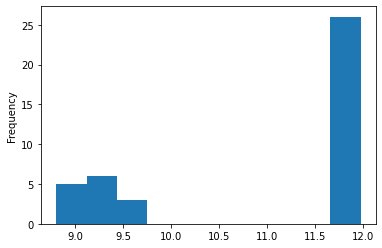

In [30]:
TOPIC_H.plot.hist();

### Compute DOC Entropy Over Topics

In [31]:
THETA_I = np.log2(1/THETA.T)
DOC_H = (THETA_I * THETA.T).sum()

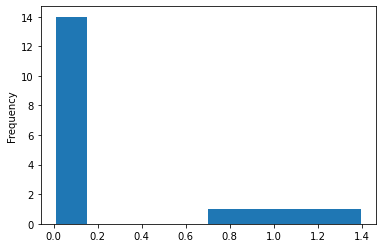

In [32]:
DOC_H.plot.hist();

### Inspect Results
Create Topics and Get top words per topic

In [33]:
TOPICS = PHI.stack().to_frame().rename(columns={0:'topic_weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
        x.sort_values('topic_weight', ascending=False)\
               .head(n_top_terms)\
               .reset_index()\
               .drop('topic_id',1)['term_str'])

In [34]:
TOPICS[[t for t in range(n_top_terms)]]

term_str,0,1,2,3,4,5,6,7,8
topic_id,,,,,,,,,
0,_alta_,rag,racing football,racing sport,racing yacht,raft,raft length,raft motion,raft planks
1,_alta_,rag,racing football,racing sport,racing yacht,raft,raft length,raft motion,raft planks
2,_alta_,rag,racing football,racing sport,racing yacht,raft,raft length,raft motion,raft planks
3,road,car,room,hotel,town,wine,water,country,trees
4,way,night,street,time,man,town,car,people,hotel
5,_alta_,rag,racing football,racing sport,racing yacht,raft,raft length,raft motion,raft planks
6,_alta_,rag,racing football,racing sport,racing yacht,raft,raft length,raft motion,raft planks
7,bull,bulls,time,medals,steer,friends,people,wall,steers
8,town,things,drunk,ring,light,place,bull ring,morning,drunk drunk


In [35]:
TOPICS.stack().to_frame('term').value_counts().to_frame('n').head(5)#.sort_values('n')#.plot.barh(figsize=(5,15))

,n
term,
_alta_,26
racing football,26
rag,26
raft length,26
raft,26


In [36]:
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ', '.join(x[:n_top_terms]), 1)

### Sort Topics by DOC Weight

In [37]:
TOPICS['doc_weight_sum'] = THETA.sum()

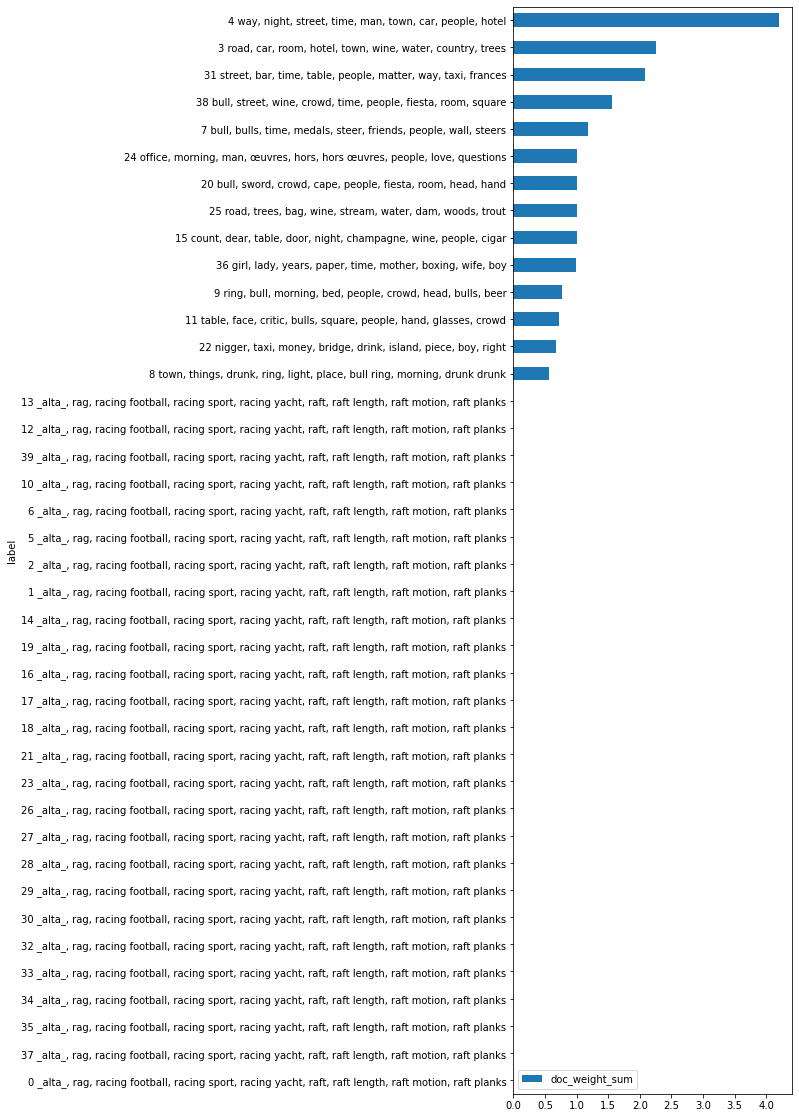

In [38]:
TOPICS.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5,n_topics/2));